## Sklearn, XGBoost

### sklearn.ensemble.RandomForestClassifier

In [1]:
from sklearn import ensemble, model_selection, metrics
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb

%matplotlib inline
plt.style.use(['seaborn', 'seaborn-talk'])

warnings.filterwarnings('ignore')

### Данные

In [2]:
bioresponce = pd.read_csv('bioresponse.csv', header=0, sep=',')
bioresponce.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
bioresponce_target = bioresponce.Activity.values
bioresponce_data = bioresponce.iloc[:, 1:]

### Модель RandomForestClassifier
#### Зависимость от количества деревьев

In [4]:
n_trees = [1] + list(range(10, 56, 5))

In [9]:
%%time
scoring = []

for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators=n_tree, min_samples_split=5, random_state=1)
    score = model_selection.cross_val_score(estimator, bioresponce_data, bioresponce_target,
                                            scoring='accuracy', cv=3)
    scoring.append(score)

scoring = np.asmatrix(scoring)

Wall time: 17 s


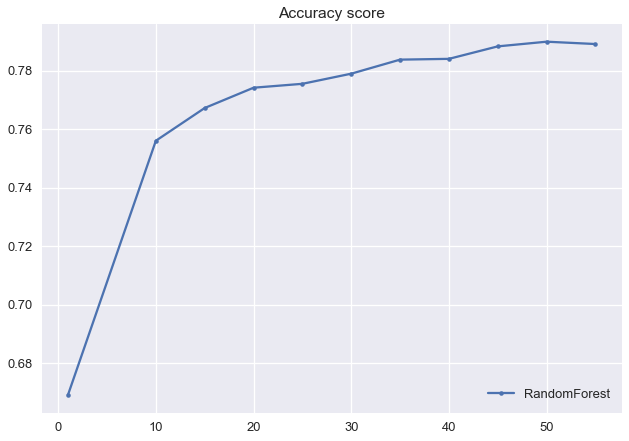

In [10]:
plt.plot(n_trees, scoring.mean(axis=1), marker='.', label='RandomForest')
plt.title('Accuracy score')
plt.legend(loc='lower right')
plt.show()

#### Кривые обучения для деревьев большей глубины

In [20]:
%%time
xgb_scoring = []
for n_tree in n_trees:
    estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree, min_child_weight=3,
                                  objective='reg:squarederror')
    score = model_selection.cross_val_score(estimator, bioresponce_data, bioresponce_target,
                                            scoring='accuracy', cv=3)
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

Wall time: 48.7 s


In [21]:
xgb_scoring

matrix([[0.76019185, 0.7488    , 0.7624    ],
        [0.78577138, 0.764     , 0.7864    ],
        [0.77857714, 0.7768    , 0.7904    ],
        [0.7833733 , 0.7776    , 0.7896    ],
        [0.78577138, 0.7816    , 0.7872    ],
        [0.78657074, 0.7848    , 0.788     ],
        [0.7873701 , 0.7864    , 0.7936    ],
        [0.78417266, 0.7872    , 0.792     ],
        [0.78816946, 0.7904    , 0.7944    ],
        [0.78816946, 0.7888    , 0.7976    ],
        [0.79056755, 0.7912    , 0.7968    ]])

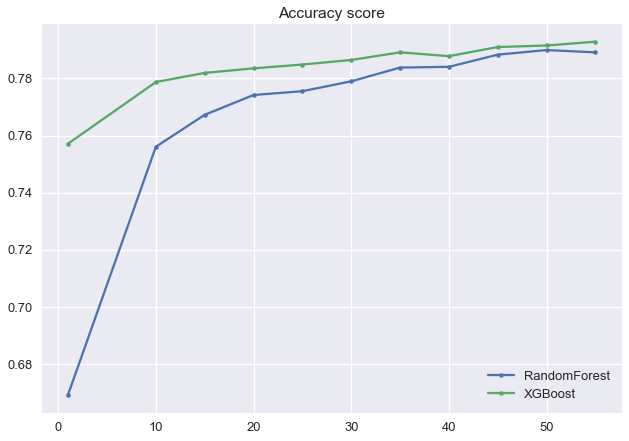

In [22]:
plt.plot(n_trees, scoring.mean(axis=1), marker='.', label='RandomForest')
plt.plot(n_trees, xgb_scoring.mean(axis=1), marker='.', label='XGBoost')
plt.title('Accuracy score')
plt.legend(loc='lower right')
plt.show()